# Problem Statement: Classify whether news is reliable or not.

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

'BEAM-11388 - ZetaSQL Functions for Beam.gsheet'   ex.zip
'Colab Notebooks'				  'PRs for BEAM-10961.gsheet'
'Employee Profile Template.pptx'


In [ ]:
data = pd.read_csv('/content/drive/My Drive/resized_v2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#read data from file
def load_data(filename):
    if(filename.endswith('csv')):
        data = pd.read_csv(filename)
    if(filename.endswith('xls') or filename.endswith('xlsx')):
        data = pd.read_excel(filename)
    return data
#data= load_data('./archive/resized_v2.csv')

Get eagle's view on the data

In [ ]:
#Get Familiar with the data
def UnderstandData(data):
    print(data.head())
          
UnderstandData(data)    

   Unnamed: 0  id                 domain        type  \
0           0  21   bipartisanreport.com   clickbait   
1           1  22       theshovel.com.au      satire   
2           2  54  blackagendareport.com  unreliable   
3           3  61     barenakedislam.com        hate   
4           4  64  blackagendareport.com  unreliable   

                                                 url  \
0  http://bipartisanreport.com/cdn-cgi/l/email-pr...   
1  http://www.theshovel.com.au/tag/malcolm-turnbu...   
2  https://blackagendareport.com/what-western-imp...   
3  http://barenakedislam.com/2018/01/08/wow-irani...   
4  https://blackagendareport.com/articlelist/afri...   

                                             content  \
0  The website from which you got to this page is...   
1  For as long as he can remember, Malcolm Turnbu...   
2  What Western Imperialism Is Up to Now in Zimba...   
3  We appreciate your help! Click here to donate\...   
4  “The massacre of the mine workers in August

In [ ]:
#Get numerical understanding to data
def describeData(data):
    print(data.describe())
describeData(data)    

          Unnamed: 0  keywords  summary
count  426550.000000       0.0      0.0
mean   213274.500000       NaN      NaN
std    123134.522998       NaN      NaN
min         0.000000       NaN      NaN
25%    106637.250000       NaN      NaN
50%    213274.500000       NaN      NaN
75%    319911.750000       NaN      NaN
max    426549.000000       NaN      NaN


In [ ]:
#Get Insights of data
def basicAnalysis(data):
    print("Number of Rows and Columns:\n", data.shape , "\n")
    print("Column Names are:\n", data.columns,"\n" )
    print("Types of columns are:\n", data.dtypes, "\n")
basicAnalysis(data)

Number of Rows and Columns:
 (426550, 17) 

Column Names are:
 Index(['Unnamed: 0', 'id', 'domain', 'type', 'url', 'content', 'scraped_at',
       'inserted_at', 'updated_at', 'title', 'authors', 'keywords',
       'meta_keywords', 'meta_description', 'tags', 'summary', 'source'],
      dtype='object') 

Types of columns are:
 Unnamed: 0            int64
id                   object
domain               object
type                 object
url                  object
content              object
scraped_at           object
inserted_at          object
updated_at           object
title                object
authors              object
keywords            float64
meta_keywords        object
meta_description     object
tags                 object
summary             float64
source               object
dtype: object 



In [ ]:
#Data Cleaning- Count Missing Values
def countMissingValues(data):
    #we remove missings first. Let's see how many missings we have
    print(data.isnull().sum())
countMissingValues(data) 

Unnamed: 0               0
id                       0
domain                   3
type                 10351
url                      3
content                  3
scraped_at               3
inserted_at              3
updated_at               3
title                 1177
authors              59495
keywords            127965
meta_keywords            3
meta_description     76270
tags                 80937
summary             127965
source              127965
dtype: int64


In [ ]:
data.tail()

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
127960,127960,2955071,dailykos.com,political,https://www.dailykos.com/news/OpenVotingConsor...,"We really are with stupid, and FSM save us all...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Daily Kos: OpenVotingConsortium,"Happy Cog Studios - Http, Www.Happycog.Com, Da...",NaN,[''],NaN,Next,NaN,NaN
127961,127961,2955178,antiwar.com,bias,http://www.antiwar.com/szamuely/sz041900.html,The Times story faithfully parrots the Adminis...,2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Decline of the West,NaN,NaN,"['embassy bombing', 'chinese embassy', 'kosovo...",NaN,NaN,NaN,NaN
127962,127962,2955209,lewrockwell.com,bias,https://www.lewrockwell.com/2005/07/fred-reed/...,‘Tother day in the afternoon I went down the h...,2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Furrin Policy,Fred Reed,NaN,[''],NaN,NaN,NaN,NaN
127963,127963,2955230,teapartytribune.com,unknown,http://www.teapartytribune.com/tag/ny-times-be...,He arrived at his court martial hearing before...,2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,ny times best seller,NaN,NaN,[''],NaN,NaN,NaN,NaN
127964,127964,2955231,teapartytribune.com,unknown,http://www.teapartytribune.com/tag/kevin-jacks...,He arrived at his court martial hearing before...,2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Kevin Jackson’s new book,NaN,NaN,[''],NaN,NaN,NaN,NaN


We can not use keywords, summary, source,tags, meta_description, meta_keywords, authors attributes as there are many missing values out of 426550 instances. 

Data Pre-Processing

In [ ]:
data['summary'] = data['summary'].astype('str') 
data['keywords'] = data['keywords'].astype('str') 
data['id'] = pd.to_numeric(data['id'], errors="coerce")

#check data type after type conversion
data.dtypes

Unnamed: 0            int64
id                  float64
domain               object
type                 object
url                  object
content              object
scraped_at           object
inserted_at          object
updated_at           object
title                object
authors              object
keywords             object
meta_keywords        object
meta_description     object
tags                 object
summary              object
source              float64
dtype: object

In [ ]:
data[["scraped_at", "inserted_at", "updated_at"]] = data[["scraped_at", "inserted_at", "updated_at"]].apply(pd.to_datetime)

In [ ]:
#Data Cleaning- Remove missing values by mode
def removeMissingValuesByMode(data, cols):
    modeval=data[cols].mode()[0]
    #print(modeval.dtype)
    data[cols].fillna(modeval,inplace=True)
    return data

In [ ]:
removeMissingValuesByMode(data,'domain')
removeMissingValuesByMode(data,'type')
removeMissingValuesByMode(data,'title')
removeMissingValuesByMode(data,'content')
removeMissingValuesByMode(data,'url')
removeMissingValuesByMode(data,'authors')
removeMissingValuesByMode(data,'scraped_at')
removeMissingValuesByMode(data,'inserted_at')
removeMissingValuesByMode(data,'updated_at')
removeMissingValuesByMode(data,'id')
countMissingValues(data) 

Unnamed: 0               0
id                       0
domain                   0
type                     0
url                      0
content                  0
scraped_at               0
inserted_at              0
updated_at               0
title                    0
authors                  0
keywords                 0
meta_keywords            3
meta_description     76270
tags                 80937
summary                  0
source              127965
dtype: int64


In [ ]:
print("Column Names are:\n", data.columns,"\n" )

Column Names are:
 Index(['Unnamed: 0', 'id', 'domain', 'type', 'url', 'content', 'scraped_at',
       'inserted_at', 'updated_at', 'title', 'authors', 'keywords',
       'meta_keywords', 'meta_description', 'tags', 'summary', 'source'],
      dtype='object') 



Data columns to be dropped are yet to be decided in team. 
I think we should remove Unnamed, id, [scraped_at,inserted_at,updated_at(these may be not)], authors,meta_keywords,meta_description, tags, summary,source.

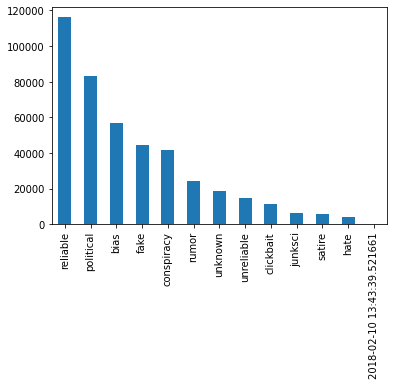

In [ ]:
data['type'].value_counts().plot(kind='bar')

Ooops! we have invalid value in the type column, so we need to remove it.

In [ ]:
#replace invalid values by mode
data['type'] = data['type'].replace(['2018-02-10 13:43:39.521661'],'reliable')

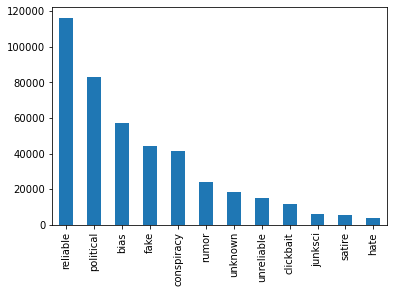

In [ ]:
data['type'].value_counts().plot(kind='bar')

In [ ]:
data.head(4)

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,0,21,bipartisanreport.com,clickbait,http://bipartisanreport.com/cdn-cgi/l/email-pr...,The website from which you got to this page is...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Email Protection,NaN,NaN,[''],NaN,NaN,NaN,NaN
1,1,22,theshovel.com.au,satire,http://www.theshovel.com.au/tag/malcolm-turnbu...,"For as long as he can remember, Malcolm Turnbu...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,malcolm turnbull satire – The Shovel,The Shovel,NaN,[''],NaN,"3, 2",NaN,NaN
2,2,54,blackagendareport.com,unreliable,https://blackagendareport.com/what-western-imp...,What Western Imperialism Is Up to Now in Zimba...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,What Western Imperialism Is Up to Now in Zimbabwe,"Bruce A. Dixon, Bar Managing Editor, Glen Ford...",NaN,[''],“The capitalist agenda is to neo-colonize Zimb...,NaN,NaN,NaN
3,3,61,barenakedislam.com,hate,http://barenakedislam.com/2018/01/08/wow-irani...,We appreciate your help! Click here to donate\...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,WOW! Iranian-Canadian protesters love Donald T...,"Cleavis Nowell, Don Spilman, Rick Oneil, Linda...",NaN,[''],NaN,NaN,NaN,NaN


In [ ]:
#because these attributes contain too many missing values that are hard to handle, better to drop them
data.pop('keywords')
data.pop('meta_keywords')
data.pop('Unnamed: 0')
data.pop('meta_description')
data.pop('tags')
data.pop('summary')
data.pop('source')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
127960   NaN
127961   NaN
127962   NaN
127963   NaN
127964   NaN
Name: source, Length: 127965, dtype: float64

In [ ]:
#because ids dont contribute to the training
data.pop('id')

0              21.0
1              22.0
2              54.0
3              61.0
4              64.0
            ...    
127960    2955071.0
127961    2955178.0
127962    2955209.0
127963    2955230.0
127964    2955231.0
Name: id, Length: 127965, dtype: float64

In [ ]:
data.pop('scraped_at')
data.pop('inserted_at')
data.pop('updated_at')

0        2018-02-02 01:19:41.756664
1        2018-02-02 01:19:41.756664
2        2018-02-02 01:19:41.756664
3        2018-02-02 01:19:41.756664
4        2018-02-02 01:19:41.756664
                    ...            
127960   2018-02-07 23:39:33.852696
127961   2018-02-07 23:39:33.852696
127962   2018-02-07 23:39:33.852696
127963   2018-02-07 23:39:33.852696
127964   2018-02-07 23:39:33.852696
Name: updated_at, Length: 127965, dtype: datetime64[ns]

In [ ]:
data.pop('title')
data.pop('authors')
data.pop('domain')
data.pop('url')

0         http://bipartisanreport.com/cdn-cgi/l/email-pr...
1         http://www.theshovel.com.au/tag/malcolm-turnbu...
2         https://blackagendareport.com/what-western-imp...
3         http://barenakedislam.com/2018/01/08/wow-irani...
4         https://blackagendareport.com/articlelist/afri...
                                ...                        
127960    https://www.dailykos.com/news/OpenVotingConsor...
127961        http://www.antiwar.com/szamuely/sz041900.html
127962    https://www.lewrockwell.com/2005/07/fred-reed/...
127963    http://www.teapartytribune.com/tag/ny-times-be...
127964    http://www.teapartytribune.com/tag/kevin-jacks...
Name: url, Length: 127965, dtype: object

In [ ]:
print("Column Names are:\n", data.columns,"\n" )

Column Names are:
 Index(['type', 'content'], dtype='object') 



In [ ]:
data.head()

,id,domain,labels,url,content,title,authors
0,21.0,bipartisanreport.com,1,http://bipartisanreport.com/cdn-cgi/l/email-pr...,The website from which you got to this page is...,Email Protection,"Backgroundurl Avatar_Large, Nickname, Joined, ..."
1,22.0,theshovel.com.au,1,http://www.theshovel.com.au/tag/malcolm-turnbu...,"For as long as he can remember, Malcolm Turnbu...",malcolm turnbull satire – The Shovel,The Shovel
2,54.0,blackagendareport.com,1,https://blackagendareport.com/what-western-imp...,What Western Imperialism Is Up to Now in Zimba...,What Western Imperialism Is Up to Now in Zimbabwe,"Bruce A. Dixon, Bar Managing Editor, Glen Ford..."
3,61.0,barenakedislam.com,1,http://barenakedislam.com/2018/01/08/wow-irani...,We appreciate your help! Click here to donate\...,WOW! Iranian-Canadian protesters love Donald T...,"Cleavis Nowell, Don Spilman, Rick Oneil, Linda..."
4,64.0,blackagendareport.com,1,https://blackagendareport.com/articlelist/afri...,“The massacre of the mine workers in August of...,Black Agenda Report,"Ann Garrison, Bar Contributor, Boniface Musavu..."


# Basic Modelling

In [ ]:
data['type'] = data['type'].apply(lambda x: "fake" if x=="fake" else "not-fake" )

In [ ]:
labels = data["type"]
labels.head()

0    not-fake
1    not-fake
2    not-fake
3    not-fake
4    not-fake
Name: type, dtype: object

In [ ]:
len(labels)

426550

In [ ]:
len(labels[labels=="fake"])

44460

## Fake rows are almost 1/10 of total rows. Hence problem gets difficult due to imbalance dataset. Will add smote for better sampling.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data['content'], labels, test_size=0.2, random_state=7)

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.02%


In [ ]:
#Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['fake','not-fake'])

array([[ 6124,  2779],
       [ 2326, 74081]])

# SMOTE to handle class imbalance

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['content'], labels, test_size=0.2, random_state=7)

In [ ]:
newsClassifier =Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('smote', SMOTE(random_state=12)),
   ('mnb', MultinomialNB(alpha =0.1))
])

In [ ]:
newsClassifier.fit(X_train,y_train)
y_pred=newsClassifier.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 86.15%


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error
print("F1 score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision:" ,precision_score(y_test, y_pred, average="macro"))
print("Recall:" ,recall_score(y_test, y_pred, average="macro"))    
print("Classification Report: \n" ,classification_report(y_test, y_pred))   

F1 score:  0.7100227499304899
Precision: 0.6711724972794308
Recall: 0.8355940535953588
Classification Report: 
               precision    recall  f1-score   support

        fake       0.36      0.80      0.50      2207
    not-fake       0.98      0.87      0.92     23386

    accuracy                           0.86     25593
   macro avg       0.67      0.84      0.71     25593
weighted avg       0.93      0.86      0.88     25593



# Basic Error Analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_encoded= le.fit_transform(y_test)
y_pred_encoded=le.fit_transform(y_pred)
print("Mean squared error: ", mean_squared_error(y_test_encoded, y_pred_encoded))
print("Mean Absolute error: ", mean_absolute_error(y_test_encoded, y_pred_encoded))

Mean squared error:  0.13847536435744148


# Data Augumentation to handle class imbalance

In [ ]:
!pip install textattack

In [ ]:
from textattack.augmentation import EmbeddingAugmenter
aug = EmbeddingAugmenter()

data['content'] = data['content'].apply(lambda x: str(aug.augment(x)))
# data['url'] = data['url'].apply(lambda x: str(aug.augment(x)))
# data['domain'] = data['domain'].apply(lambda x: str(aug.augment(x)))
# data['authors'] = data['authors'].apply(lambda x: str(aug.augment(x)))
# data['title'] = data['title'].apply(lambda x: str(aug.augment(x)))

# Multilingual Transformer

In [ ]:
pip install datasets==1.3.0

     |████████████████████████████████| 184kB 17.4MB/s 
     |████████████████████████████████| 245kB 40.4MB/s 
     |████████████████████████████████| 112kB 59.6MB/s 


In [ ]:
pip install transformers==4.3.2

     |████████████████████████████████| 1.8MB 16.6MB/s 
     |████████████████████████████████| 870kB 51.2MB/s 
     |████████████████████████████████| 3.3MB 56.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=d325c10d155cd3ea3c7d1785e1954fe6c887040d87e50e20fab9316c7ac523a2
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses


In [ ]:
pip install numpy==1.20.1

     |████████████████████████████████| 15.3MB 183kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [ ]:
data.rename(columns = {'type' : 'labels'}, inplace = True)

In [ ]:
index_to_labels = {index: label for index, label in enumerate(data['labels'])}

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data['labels'] = le.fit_transform(data['labels'])

In [ ]:
data.head()

,id,domain,labels,url,content,title,authors
0,21.0,bipartisanreport.com,not-fake,http://bipartisanreport.com/cdn-cgi/l/email-pr...,The website from which you got to this page is...,Email Protection,"Backgroundurl Avatar_Large, Nickname, Joined, ..."
1,22.0,theshovel.com.au,not-fake,http://www.theshovel.com.au/tag/malcolm-turnbu...,"For as long as he can remember, Malcolm Turnbu...",malcolm turnbull satire – The Shovel,The Shovel
2,54.0,blackagendareport.com,not-fake,https://blackagendareport.com/what-western-imp...,What Western Imperialism Is Up to Now in Zimba...,What Western Imperialism Is Up to Now in Zimbabwe,"Bruce A. Dixon, Bar Managing Editor, Glen Ford..."
3,61.0,barenakedislam.com,not-fake,http://barenakedislam.com/2018/01/08/wow-irani...,We appreciate your help! Click here to donate\...,WOW! Iranian-Canadian protesters love Donald T...,"Cleavis Nowell, Don Spilman, Rick Oneil, Linda..."
4,64.0,blackagendareport.com,not-fake,https://blackagendareport.com/articlelist/afri...,“The massacre of the mine workers in August of...,Black Agenda Report,"Ann Garrison, Bar Contributor, Boniface Musavu..."


In [ ]:
from datasets import load_dataset

In [ ]:
data.columns

Index(['labels', 'content'], dtype='object')

In [ ]:
from datasets import Dataset
import pandas as pd
dataset = Dataset.from_pandas(data)

In [ ]:
import datasets
import random
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=5):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)
    
    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))

In [ ]:
show_random_elements(dataset)

In [ ]:
from datasets import DatasetDict
# 90% train, 10% test + validation
train_testvalid = dataset.train_test_split(test_size=0.1)
# Split the 10% test + valid in half test, half valid
test_valid = train_testvalid["test"].train_test_split(test_size=0.5)
fake_news_ds = DatasetDict({
    "train": train_testvalid["train"],
    "test": test_valid["test"],
    "validation": test_valid["train"]})

In [ ]:
fake_news_ds

DatasetDict({
    train: Dataset({
        features: ['labels', 'content'],
        num_rows: 115168
    })
    test: Dataset({
        features: ['labels', 'content'],
        num_rows: 6399
    })
    validation: Dataset({
        features: ['labels', 'content'],
        num_rows: 6398
    })
})

In [ ]:
# from transformers import RobertaTokenizer, RobertaModel

# model_name = 'roberta-base'
# model = RobertaModel.from_pretrained(model_name)
# tokenizer = RobertaTokenizer.from_pretrained(model_name, use_fast=True)

In [ ]:
from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer

model_name = 'xlm-roberta-base'
config = AutoConfig.from_pretrained(model_name, num_labels=2)
model = AutoModelForSequenceClassification.from_config(config=config)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples['content'], truncation=True , padding=True)

#all strings to be encoded 

def convert_labels_to_int(example):
   if example['labels'] == 'fake':
     example['labels'] = 1
   else:
     example['labels'] = 0
   return example

encoded_dataset = fake_news_ds.map(preprocess_function, batched=True)
encoded_dataset = encoded_dataset.map(convert_labels_to_int)

In [ ]:
def encode_domain(examples):
    return tokenizer(examples['domain'], truncation=True, padding=True )

def encode_authors(examples):
    return tokenizer(examples['authors'], truncation=True, padding=True )

def encode_title(examples):
    return tokenizer(examples['title'], truncation=True, padding=True )

def encode_url(examples):
    return tokenizer(examples['url'], truncation=True, padding=True )    


In [ ]:
# encoded_dataset = encoded_dataset.map(encode_domain)
# encoded_dataset = encoded_dataset.map(encode_authors)
# encoded_dataset = encoded_dataset.map(encode_title)
# encoded_dataset = encoded_dataset.map(encode_url)

In [ ]:
show_random_elements(encoded_dataset['train'])

In [ ]:
encoded_dataset

DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'content', 'input_ids', 'labels'],
        num_rows: 115168
    })
    test: Dataset({
        features: ['attention_mask', 'content', 'input_ids', 'labels'],
        num_rows: 6399
    })
    validation: Dataset({
        features: ['attention_mask', 'content', 'input_ids', 'labels'],
        num_rows: 6398
    })
})

In [ ]:
from transformers import Trainer, TrainingArguments
metric_name = "accuracy"

args = TrainingArguments(
    "fake-new",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    save_steps=1000,
    save_total_limit=200
)

In [ ]:
metric = datasets.load_metric('accuracy')
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
validation_key = "validation"
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,Runtime,Samples Per Second
1,0.316500,0.321899,0.915130,213.839200,29.920000


TrainOutput(global_step=14396, training_loss=0.32360628705185035, metrics={'train_runtime': 13026.3002, 'train_samples_per_second': 1.105, 'total_flos': 98371301318393856, 'epoch': 1.0})

In [ ]:
trainer.evaluate()

{'epoch': 1.0,
 'eval_accuracy': 0.9151297280400125,
 'eval_loss': 0.3218992352485657,
 'eval_runtime': 213.993,
 'eval_samples_per_second': 29.898}

In [ ]:
def label_to_text(input):
  if input == 1:
    return "fake"
  else:
    return "not-fake"

In [ ]:
prepared_input = tokenizer.prepare_seq2seq_batch(["We appreciate your help! Click here to donate."], return_tensors='pt')
model = model.to('cpu')
model.eval()
model_output = model(**prepared_input)
prediction = np.argmax(model_output.logits[0].detach().numpy())
#index_to_labels[prediction]
label_to_text(prediction)

# Export model

In [ ]:
model.save_pretrained("model/default")
!zip -r model/default.zip model/default

In [ ]:
from google.colab import files
files.download("model/default.zip")